<a href="https://colab.research.google.com/github/mohammedrefai20/Hand-Gesture-Classification/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
df = pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X=df.drop('label', axis=1)
y=df['label']

# Data Visualization

# Preprocessing


1.   Subtract all point of x,y from x0,y0
2.   calculate norm of x12,y12 and divide all points of x,y on this norm




In [8]:
for axis in ['x', 'y']:
    base_col = f'{axis}1'
    cols = [f'{axis}{i}' for i in range(2, 22)]
    X[cols] = X[cols].sub(X[base_col], axis=0)

In [9]:
norm = np.sqrt(X['x12']**2 + X['y12']**2)
norm = norm.replace(0, np.nan)
X_col = [f'x{i}' for i in range(1, 22)]
y_col = [f'y{i}' for i in range(1, 22)]
X[X_col] = X[X_col].div(norm, axis=0)
X[y_col] = X[y_col].div(norm, axis=0)

# Data Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20540, 63), (5135, 63), (20540,), (5135,))

In [13]:
X_train.head(3)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
7330,3.475524,5.011933,-7.949529e-08,0.382371,-0.116283,-0.006374,0.611639,-0.289616,-0.017884,0.808025,...,-0.039041,0.669639,-0.633505,-0.050576,0.601315,-0.462675,-0.045012,0.452230,-0.417500,-0.038280
19295,4.997889,2.683518,1.827579e-07,0.211663,-0.157229,-0.004533,0.291986,-0.373925,-0.007546,0.205355,...,-0.019523,-0.301546,-0.631667,-0.025103,-0.323085,-0.758427,-0.028301,-0.338992,-0.865745,-0.030005
13987,1.602412,3.766964,3.728866e-07,-0.140141,-0.225459,-0.001540,-0.125720,-0.418897,-0.008423,0.016992,...,-0.033196,0.236414,-0.461642,-0.034893,0.187719,-0.414453,-0.027841,0.166363,-0.349398,-0.020865


# Learning Phase

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import f1_score

#KNN Model

In [29]:
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',metric='manhattan')
cv_scores = cross_val_score(knn,X_train,y_train,cv=3,scoring='f1_macro')
#Scores of cross validation
print("Cross Validation Scores:", cv_scores)

#mean score of the 3 folds = score of the knn model
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.93471338 0.93612187 0.93534179]
Mean CV Score: 0.9353923466104082


In [ ]:
#fit model on whole data
knn.fit(X_train, y_train)

#predict the performane of the model
y_pred = knn.predict(X_test)

#calculte f1 score on test split
f1 = f1_score(y_test, y_pred,average='macro')
print("Test F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
y_predknn = best_model_knn.predict(X_test)
knn_f1= f1_score(y_test, y_predknn, average='weighted')
print("F1 Score (KNN):", knn_f1)
print(classification_report(y_test, y_predknn))
cm_knn = confusion_matrix(y_test, y_predknn)

F1 Score (KNN): 0.9468758435683283
                 precision    recall  f1-score   support

           call       0.99      0.95      0.97       287
        dislike       1.00      1.00      1.00       260
           fist       0.97      0.99      0.98       209
           four       0.94      0.94      0.94       325
           like       0.96      0.99      0.97       304
           mute       0.96      0.98      0.97       195
             ok       0.97      0.95      0.96       340
            one       0.96      0.93      0.94       248
           palm       0.94      0.95      0.95       317
          peace       0.88      0.88      0.88       276
 peace_inverted       0.93      0.88      0.91       307
           rock       0.98      0.97      0.98       290
           stop       0.91      0.92      0.91       293
  stop_inverted       0.91      0.97      0.94       309
          three       0.98      0.93      0.96       298
         three2       0.99      0.98      0.99      

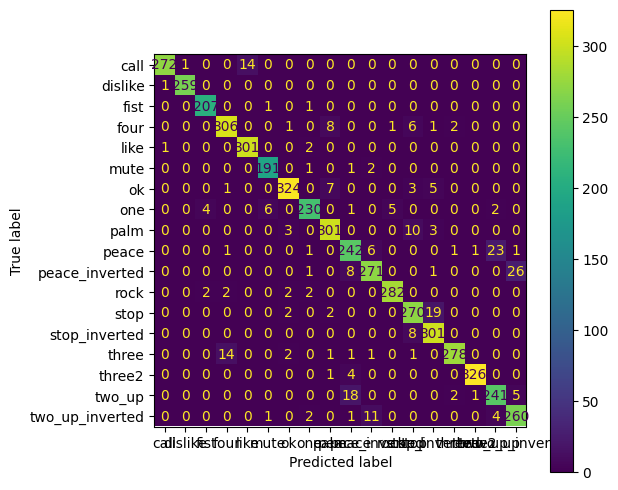

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn,
    display_labels=best_model_knn.classes_
)

disp.plot(ax=ax)
plt.show()


In [ ]:
# parameters_svm = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf']
# }
parameters_svm = {
    'C': [100],
    'gamma': [1],
    'kernel': ['rbf']
}
svm = SVC()
grid_svm = GridSearchCV(svm, parameters_svm, cv=3, scoring='accuracy', n_jobs=-1,verbose= 1 ,return_train_score=True)
grid_svm.fit(X_train, y_train)
mean_acc_svm = grid_svm.best_score_
svm = grid_svm.best_estimator_
print("Train Scores (SVM):", grid_svm.cv_results_['mean_train_score'])


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Train Scores (SVM): [0.7202529  0.7984664  0.45645087 0.22697139 0.98244886 0.94493669
 0.77524348 0.4561344  0.99929406 0.98697664 0.91587145 0.73042847
 1.         0.9976631  0.97324731 0.86253648]


In [ ]:
grid_svm.best_score_

np.float64(0.978042895277258)

In [ ]:
parameters_svm = {
    'C': [130],
    'gamma': [0.05],
    'kernel': ['rbf']
}
svm = SVC()
grid_svm = GridSearchCV(svm, parameters_svm, cv=3, scoring='accuracy', n_jobs=-1,verbose= 1 ,return_train_score=True)
grid_svm.fit(X_train, y_train)
mean_acc_svm = grid_svm.best_score_
svm = grid_svm.best_estimator_
print("Train Scores (SVM):", grid_svm.cv_results_['mean_train_score'])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Train Scores (SVM): [0.99598884]


In [ ]:
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
svm_f1=f1_score(y_test,y_pred_svm,average='weighted')
print("F1 Score (SVM):", svm_f1)
# print(classification_report(y_test, y_pred_svm))

F1 Score (SVM): 0.9810068114251197


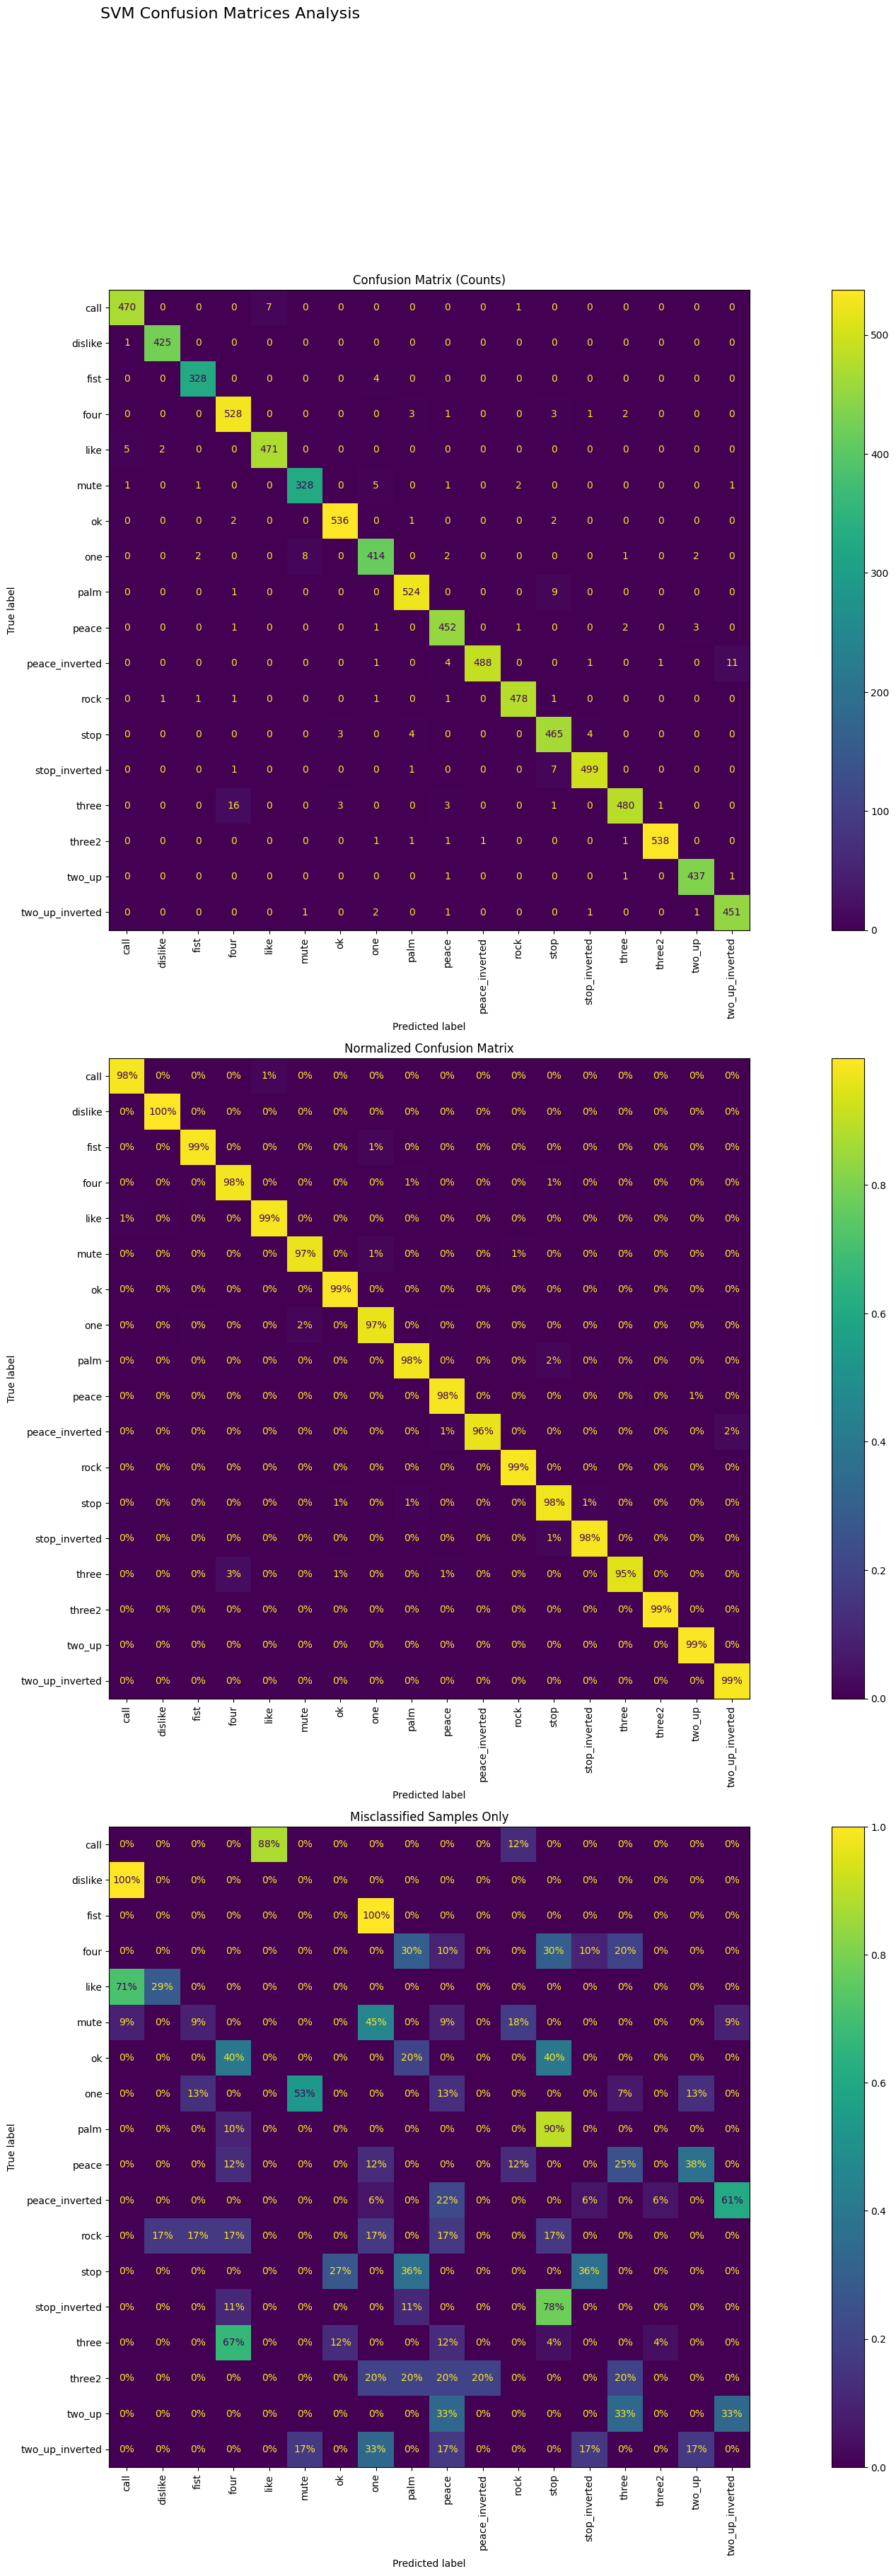

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

os.makedirs("artifacts", exist_ok=True)

fig, axes = plt.subplots(3, 1, figsize=(30, 40))
cm_counts = confusion_matrix(y_test, y_pred_svm)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_counts,display_labels=svm.classes_)
disp1.plot(ax=axes[0])
axes[0].set_title("Confusion Matrix (Counts)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

cm_norm = confusion_matrix(y_test, y_pred_svm, normalize="true")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_norm,display_labels=svm.classes_)
disp2.plot(ax=axes[1],values_format=".00%")
axes[1].set_title("Normalized Confusion Matrix")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
sample_weight = (y_pred_svm != y_test)
cm_error = confusion_matrix(y_test,y_pred_svm,sample_weight=sample_weight,normalize="true")
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_error,display_labels=svm.classes_)
disp3.plot(ax=axes[2],values_format=".00%")
axes[2].set_title("Misclassified Samples Only")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


fig.suptitle("SVM Confusion Matrices Analysis", fontsize=16, y=0.98)

plt.savefig("artifacts/svm_confusion_matrices.png", dpi=300, bbox_inches="tight")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=42, n_jobs=-1)
parameters = {'max_depth':[5], 'n_estimators':[400,500,600]}
grid_search = GridSearchCV(rf_model, parameters, cv=3, verbose=1)
grid_search.fit(X_train, y_train)
rf_model = grid_search.best_estimator_
mean_acc_rf = grid_search.best_score_
print("Train Scores (rf_model):", grid_search.cv_results_['mean_test_score'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Train Scores (rf_model): [0.69527702 0.72030122 0.71514066 0.83388504 0.82867611 0.83612479
 0.89600795 0.89907519 0.90029222]


In [ ]:
y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("F1 Score (Random Forest):", f1_rf)
print(classification_report(y_test, y_pred_rf))

F1 Score (Random Forest): 0.9005390934677442
                 precision    recall  f1-score   support

           call       0.98      0.99      0.98       287
        dislike       1.00      1.00      1.00       260
           fist       0.99      0.99      0.99       209
           four       0.94      0.91      0.92       325
           like       0.99      0.98      0.98       304
           mute       0.98      0.94      0.96       195
             ok       0.97      0.99      0.98       340
            one       0.94      0.97      0.95       248
           palm       0.93      0.94      0.93       317
          peace       0.58      0.80      0.67       276
 peace_inverted       0.80      0.82      0.81       307
           rock       0.99      0.98      0.99       290
           stop       0.87      0.90      0.88       293
  stop_inverted       0.95      0.95      0.95       309
          three       0.97      0.94      0.96       298
         three2       0.91      0.98      

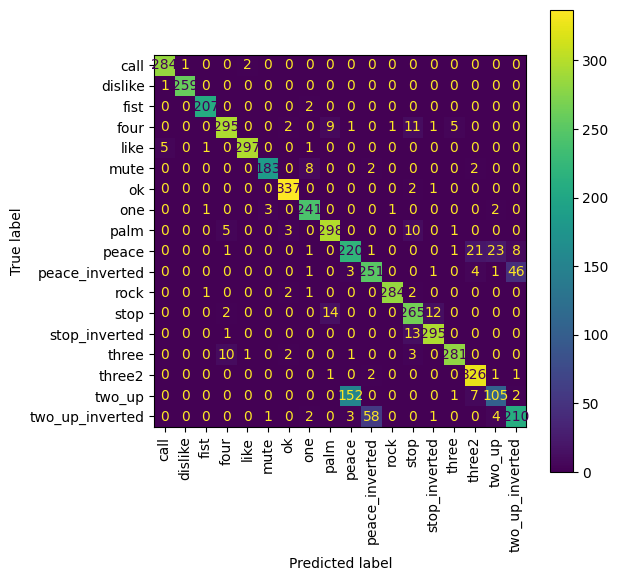

In [ ]:

fig, ax = plt.subplots(figsize=(6,6))
disp_rf = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf,
    display_labels=rf_model.classes_
)
disp_rf.plot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model=DecisionTreeClassifier(max_depth=5, random_state=42)
adb_model = AdaBoostClassifier(random_state=42, estimator=base_model)

parameters_adb = {'n_estimators':[500], 'learning_rate':[0.8]}
grid_search_adb = GridSearchCV(adb_model, parameters_adb, cv=3, n_jobs=-1, verbose=1)
grid_search_adb.fit(X_train, y_train)
adb_model = grid_search_adb.best_estimator_
mean_acc_adb = grid_search_adb.best_score_
print("Train Scores (adb_model):", grid_search_adb.cv_results_['mean_test_score'])
print("Best Parameters (adb_model):", grid_search_adb.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Train Scores (adb_model): [0.93729337 0.93816971 0.94503428 0.94381721]
Best Parameters (adb_model): {'learning_rate': 0.8, 'n_estimators': 500}
Mean CV Accuracy (adb_model): 0.945034281066989


In [ ]:
y_pred_adb = adb_model.predict(X_test)
cm_adb = confusion_matrix(y_test, y_pred_adb)
f1_db = f1_score(y_test, y_pred_adb, average='weighted')
print("F1 Score (AdaBoost):", f1_db)
print(classification_report(y_test, y_pred_adb))



F1 Score (AdaBoost): 0.9421630027291806
                 precision    recall  f1-score   support

           call       0.99      0.99      0.99       287
        dislike       1.00      0.99      1.00       260
           fist       0.99      0.99      0.99       209
           four       0.96      0.98      0.97       325
           like       0.99      0.98      0.99       304
           mute       0.96      0.95      0.96       195
             ok       0.99      0.99      0.99       340
            one       0.94      0.96      0.95       248
           palm       0.98      0.98      0.98       317
          peace       0.81      0.71      0.76       276
 peace_inverted       0.87      0.82      0.84       307
           rock       0.99      0.99      0.99       290
           stop       0.94      0.99      0.96       293
  stop_inverted       0.99      0.96      0.98       309
          three       0.99      0.96      0.98       298
         three2       0.99      0.99      0.99 

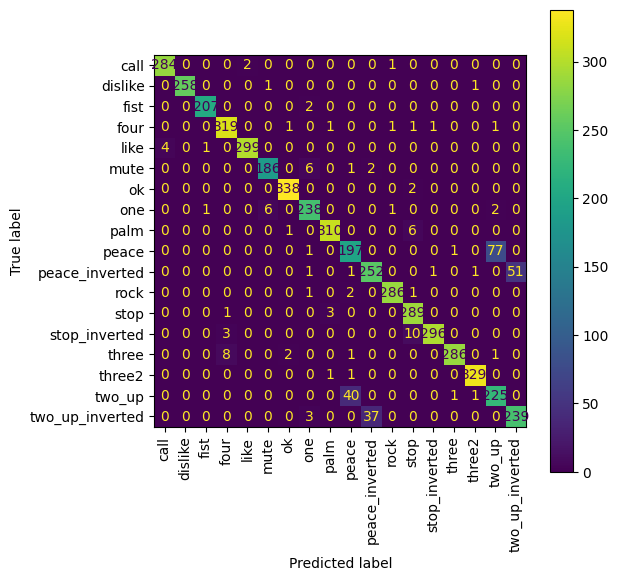

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
disp_adb = ConfusionMatrixDisplay(
    confusion_matrix=cm_adb,
    display_labels=adb_model.classes_
)
disp_adb.plot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()